# Library

In [1]:
!pip install opendatasets

In [10]:
# Library to dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od

# Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Dataset

In [3]:
# Download dataset
od.download("https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch")

# Import dataset
df = pd.read_csv('suicide-watch/Suicide_Detection.csv',index_col=0)
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading suicide-watch.zip to .\suicide-watch


100%|██████████| 60.6M/60.6M [00:29<00:00, 2.16MB/s]


,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [4]:
# Check the text col 
df['text']

0         Ex Wife Threatening SuicideRecently I left my ...
1         Am I weird I don't get affected by compliments...
2         Finally 2020 is almost over... So I can never ...
3                 i need helpjust help me im crying so hard
4         I’m so lostHello, my name is Adam (16) and I’v...
                                ...                        
232069    If you don't like rock then your not going to ...
232070    You how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    The usual stuff you find hereI'm not posting t...
232073    I still haven't beaten the first boss in Hollo...
Name: text, Length: 232074, dtype: object

In [5]:
# Check the information of datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


# Visualization

<AxesSubplot: title={'center': 'Persebaran Class'}>

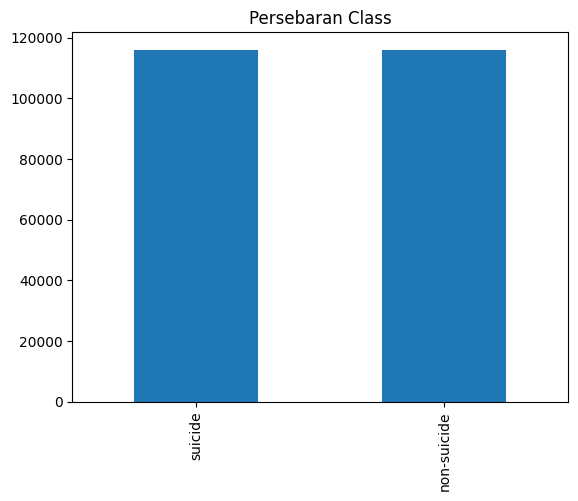

In [6]:
# Class visualization barplot
df['class'].value_counts().plot(kind="bar",title='Persebaran Class')

# Cleaning

## Clean the text

In [7]:
# Preprocessing
x1 = df.text

documents = [] # Make empty list


for i in range(0, len(x1)):
    # Remove URL
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', str(x1[i]))
    text = re.sub(r'#([^\s]+)', '', text)

    # Remove all the special characters
    document = re.sub(r'\W', ' ', text)
    
    # remove all single characters
    document1 = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document2 = re.sub(r'\^[a-zA-Z]\s+', ' ', document1) 
    
    # Remove numeric
    document3 = re.sub(r"\d+", "", document2)
    
    # Substituting multiple spaces with single space
    document4 = re.sub(r'\s+', ' ', document3, flags=re.I)
    
    # Converting to Lowercase
    document5 = document4.lower()

    # Remove whitespace at begin and end string
    document6 = document5.strip()
    
    documents.append(document6)

x1_v1 = documents
x1_v1

['ex wife threatening suiciderecently left my wife for good because she has cheated on me twice and lied to me so much that have decided to refuse to go back to her as of few days ago she began threatening suicide have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe ll come back know lot of people will threaten this in order to get their way but what happens if she really does what do do and how am supposed to handle her death on my hands still love my wife but cannot deal with getting cheated on again and constantly feeling insecure m worried today may be the day she does it and hope so much it doesn happen',
 'am weird don get affected by compliments if it coming from someone know irl but feel really good when internet strangers do it',
 'finally is almost over so can never hear has been bad year ever again swear to fucking god it so annoying',
 'i need helpjust help me im crying so hard',
 'i so losthello my name is ad

## Stopword Removal

In [8]:
# Remove stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

documents1 = []
for i in range(0, len(x1_v1)):
    text = x1_v1[i].split()
    text = [word for word in text if word not in stopwords]
    text = ' '.join(text)
    documents1.append(text)

x1_v2 = documents1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Check clean text
x1_v2

['ex wife threatening suiciderecently left wife good cheated twice lied much decided refuse go back days ago began threatening suicide tirelessly spent paat days talking keeps hesitating wants believe come back know lot people threaten order get way happens really supposed handle death hands still love wife cannot deal getting cheated constantly feeling insecure worried today may day hope much happen',
 'weird get affected compliments coming someone know irl feel really good internet strangers',
 'finally almost never hear bad year ever swear fucking god annoying',
 'need helpjust help im crying hard',
 'losthello name adam struggling years afraid past years thoughts suicide fear anxiety close limit quiet long scared come family feelings years ago losing aunt triggered everyday feeling hopeless lost guilty remorseful things done life thoughts like little experienced life time revealed feelings family broke saw cuts watching get worried something portrayed average day made feel absolute

## Stemming

In [11]:
# Stemming
stemmer = PorterStemmer()

documents2 = []
for i in range(0, len(x1_v2)):
    text = x1_v2[i].split()
    text = [stemmer.stem(word) for word in text]
    text = ' '.join(text)
    documents2.append(text)

In [12]:
# Check clean text
x1_v3 = documents2
x1_v3

['ex wife threaten suiciderec left wife good cheat twice lie much decid refus go back day ago began threaten suicid tirelessli spent paat day talk keep hesit want believ come back know lot peopl threaten order get way happen realli suppos handl death hand still love wife cannot deal get cheat constantli feel insecur worri today may day hope much happen',
 'weird get affect compliment come someon know irl feel realli good internet stranger',
 'final almost never hear bad year ever swear fuck god annoy',
 'need helpjust help im cri hard',
 'losthello name adam struggl year afraid past year thought suicid fear anxieti close limit quiet long scare come famili feel year ago lose aunt trigger everyday feel hopeless lost guilti remors thing done life thought like littl experienc life time reveal feel famili broke saw cut watch get worri someth portray averag day made feel absolut dread later found attempt survivor attempt od overdos pill attempt hang happen blackout pill never went noos still

# Export to excel

In [13]:
# Export clean text
df['clean_text'] = x1_v3
df.to_csv('clean_text.csv',index=False)